<a href="https://colab.research.google.com/github/datasciencefefu/course/blob/main/01_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы статистического анализа

В процессе анализа данных возникает множество гипотез, которые удобно проверять статистическими методами. В этой главе будут рассмотрены основы статистики и теории вероятности.

## Описательная статистика

### Категориальные и количественные, непрерывные и дискретные переменные
При работе со статистикой важно понимать используемую терминологию, включая количественные и категориальные переменные и то, как они отличаются.

Количественные признаки можно сравнить между собой на «больше или меньше», а категориальные признаки так сравнить нельзя. Категориальная переменная не имеет численного или количественного значения, а просто описывает качество или характеристику чего-то.
**Категориальная (качественная)** переменная принимает значение из
ограниченного набора. Цифры, используемые в категориальных или качественных данных, обозначают качество, а не измерение или количество. Если в качестве значения роста указать «низкий», «средний» и «высокий», то это будет уже категориальный признак и качественная характеристика роста. Категориальный признак принимает одно из ограниченного набора значений. При необходимости и для удобства качественные признаки можно закодировать. Так значение «низкий» получит код 1, «средний» — 2, «высокий» — 3. 

Количественные переменные измеряются и выражаются численно, имеют числовое значение и могут использоваться в расчетах (поэтому иначе их называют  числовые переменные). **Количественная** переменная принимает числовое значение в
диапазоне. Количественные переменные подразделяются на:
* **Непрерывные**, которые могут принимать любое численное значение.
* **Дискретные**, которые могут принимать строго определённые
значения (переменные, в которых значения могут быть получены путем подсчета).

Дискретная переменная принимает независимые значения, тогда как непрерывная переменная принимает любое значение в заданном диапазоне.


### Гистограммы

Для описания величин удобно использовать наглядное представление данных. График, который показывает, сколько раз в наборе данных встречается то или иное значение называется гистограммой. **Гистограмма** объединяет числовые значения по диапазонам, то есть считает частоту значений в пределах каждого интервала. Её построение подобно работе метода **value_counts()**, подсчитывающего количество уникальных значений в списке. Однако value_counts() группирует строго одинаковые величины и хорош только для подсчёта частоты в списках с категориальными переменными.

В Pandas гистограмму строит специальный метод **hist()** (от англ. histogram — «гистограмма»). Применять его можно к списку или к столбцу датафрейма: во втором случае название столбца передаётся в параметре. Метод hist() находит в наборе чисел минимальное и максимальное значения, а полученный диапазон делит на области или «корзины» - bins (англ. «корзины, вёдра»). Затем hist() считает, сколько значений попало в каждую корзину, и отображает это на графике.



### Гистограмма частот для непрерывной переменной

Одним из подходов в визуализации значений непрерывных переменных
является разделение множества значений на интервалы и подсчёт
количества значений, попадающих в каждый интервал. 





Параметр **bins** определяет, на сколько областей делить диапазон данных. По умолчанию таких «корзин» 10.
В Pandas при построении гистограммы можно задавать не только
количество интервалов - корзин, но и явно указывать их границы.

(array([2., 3., 1., 4.]),
 array([1.5, 2.3, 3.9, 4.1, 5. ]),
 <a list of 4 Patch objects>)

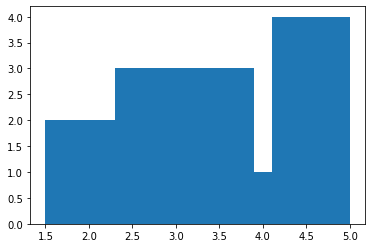

In [ ]:
import matplotlib.pyplot as plt

data = [1.5, 2.3, 2.2, 3.8, 3.3, 3.9, 4.1, 4.3, 4.5, 4.7]
plt.hist(data, bins=[1.5, 2.3, 3.9, 4.1,
                     5])  # Края корзин. Длина nbins + 1 (левый край nbins и правый край последнего значения). 
# Всегда один массив, даже если передается несколько наборов данных.

Однако, такой подход не может дать полное представление о значениях
переменной, так как полученная гистограмма сильно зависит от того, как
разбить множество значений на интервалы и какой выбрать шаг (ширину ячейки).


In [ ]:
import plotly.express as px

df = px.data.tips()
fig = px.histogram(df, x="total_bill", nbins=20, title="Разбиение на 20 корзин")
fig1 = px.histogram(df, x="total_bill", nbins=40, title="Разбиение на 40 корзин")
fig.show()
fig1.show()

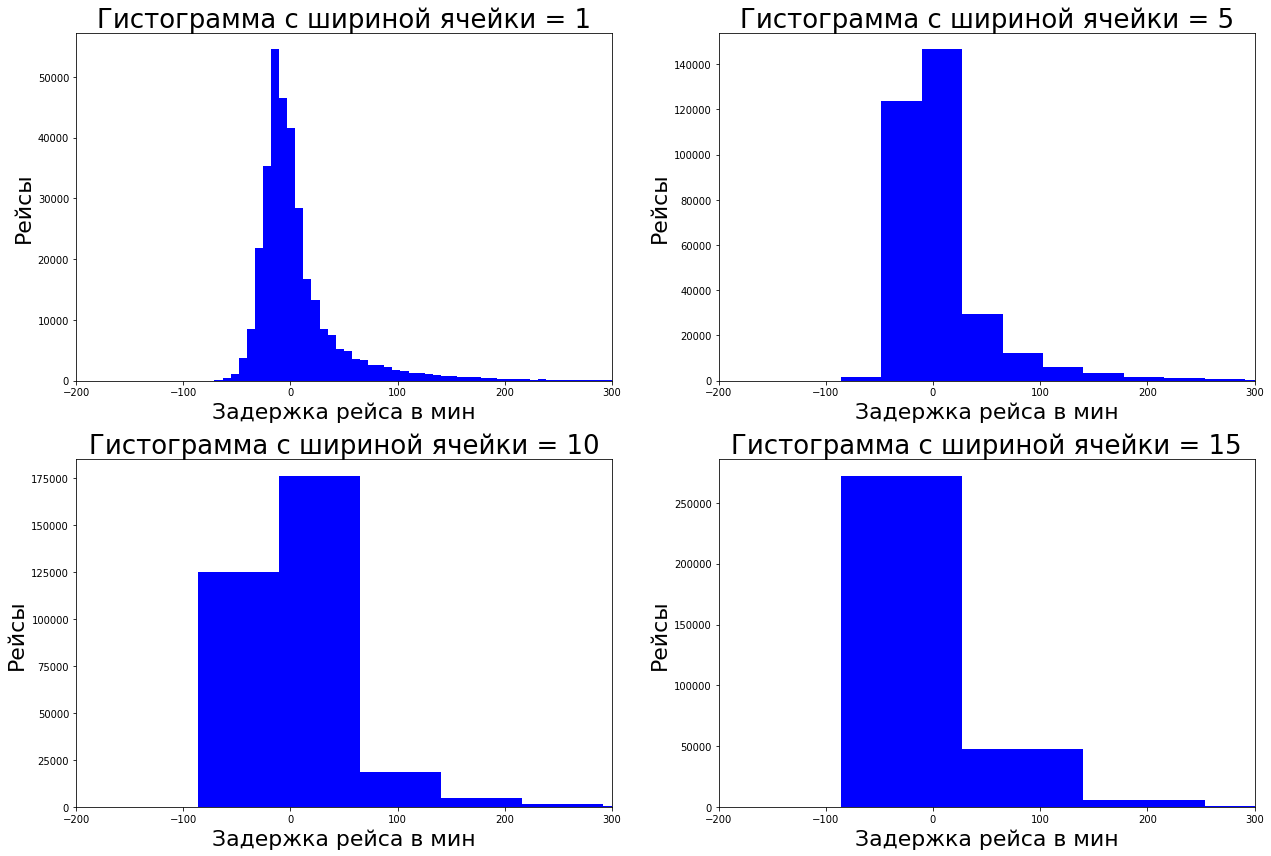

In [ ]:
import pandas as pd
from pylab import *

flights = pd.read_csv('https://raw.githubusercontent.com/datasciencefefu/course/main/data/flights.csv')
rcParams['figure.figsize'] = 18, 12

# Установим 4 различных ширины ячейки
for i, binwidth in enumerate([1, 5, 10, 15]):
    ax = plt.subplot(2, 2, i + 1)

    ax.hist(flights['arr_delay'], bins=int(180 / binwidth),
            color='blue')
    
    plt.xlim([-200,300])
    ax.set_title('Гистограмма с шириной ячейки = %d' % binwidth, size=26)
    ax.set_xlabel('Задержка рейса в мин', size=22)
    ax.set_ylabel('Рейсы', size=22)

plt.tight_layout()
plt.show()

### Гистограммы плотностей
Для того, чтобы решить недостаток разбиения на интервалы,
применяется метод, отображающий частоту не высотой столбца в гистограмме, а его площадью. Площадь столбца находят, как площадь
прямоугольника: длину интервала умножают на высоту столбца.
Найденная площадь — частота непрерывной переменной, а высота
столбца — **плотность частоты**. Гистограмма, использующая в качества
переменной - столбца плотность частоты, называется **плотностная гистограмма**.

Для того, чтобы оценить, сколько значений попало в любой интервал, не
обязательно выбранный для построения, берут два значения и ищут
площадь плотностной гистограммы между ними. Полученное число и
будет оценкой количества значений, попавших в интервал.

Плотность частоты для непрерывных переменных можно задавать не
только прямоугольниками, как на гистограммах, но и кривыми
функциями. Работает тот же принцип: площадь между двумя значениями
пропорциональна частоте попадания значений в интервал между ними.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Density')

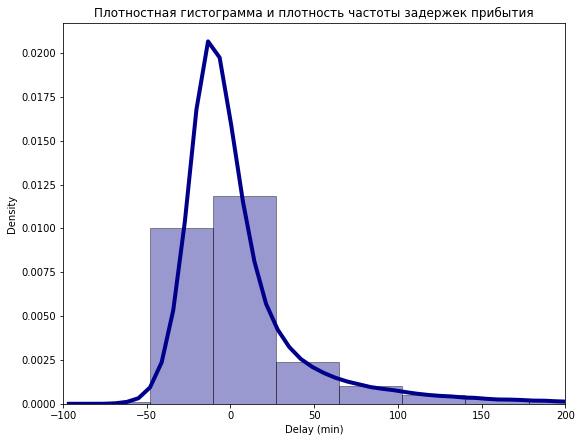

In [ ]:
import seaborn as sns

rcParams['figure.figsize'] = 9, 7
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             # Kernel density estimation (kde) рисуется в виде линии и часто повторяет форму гистограмм, 
             # но дает больше информации о характере распределения
             bins=int(180 / 5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4});

plt.xlim([-100,200])
plt.title('Плотностная гистограмма задержек прибытия')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

Кривая показывает график плотности, который по сути является гладкой версией гистограммы. Ось Y соответствует плотности, и гистограмма по умолчанию нормализована, так что она имеет тот же масштаб Y, что и график плотности.

### Метрики локации данных
Познакомимся с характеристиками, которые помогут описать разброс данных в датасете. 

> **Разброс данных** — это понятие, которое используют, чтобы описать отклонения значений набора данных от среднего. 

Такие характерные значения выборки, как медиана и среднее значение,
также называют **метрики локации данных**: по медиане и среднему можно
судить, где примерно расположен набор данных на числовой оси.
Для расчёта среднего значения берут все значения датасета — это
наиболее полное использование информации при поиске метрики
локации. Среднее значение называют **алгебраической метрикой локации**, медиану —
**структурной метрикой локации**.




Такие характеристики, дающие представление о выборке, входят в **числовое описание данных**. В Python его получают методом describe() (от англ. «описать, охарактеризовать»). Результат отработки метода — список характерных значений:

In [ ]:
data = sns.load_dataset("tips")
print(data.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Для представления о данных, недостаточно знать метрики локации,
нужно ещё понимать, как данные разбросаны вокруг них. У структурной
метрики локации есть структурные метрики разброса - **квартили** (см. [Диаграмма размаха](https://colab.research.google.com/drive/1lfgEaR57nrfETmvCQ6tfO3h_MdLGEOez#scrollTo=rGPhhFRwpbKO&line=1&uniqifier=1)).


###Средние величины

Существуют значения, характеризующие состояние выборки, — набора данных, выбранных для проведения исследования. Чтобы примерно оценить типичные значения выборки, годятся среднее арифметическое или медиана. 

> **Среднее арифметическое** — сумма всех значений, деленная на их количество. Показывает общую тенденцию данных и описывает их одним числом. Именно среднее арифметическое показывает какие примерно значения можно встретить в наборе с данными. Например, средний рост студентов. 

Для быстрого расчета в NumPy пользуемся методом **mean()**:

In [ ]:
import numpy as np

x = [1.67, 1.89, 1.90, 1.58, 1.57, 1.73, 1.75, 1.82, 1.50]
np.mean(x)

1.7122222222222223

> **Взвешенное среднее арифметическое** — это среднее арифметическое для данных, где значения могут иметь разный вес, и некоторые значения должны сильнее влиять на результат, чем другие.

В данных могут быть значения, которые принимают величину существенно выше или ниже среднего и сильно отличаются от остальных — **выбросы**. Тогда вместо среднего арифметического лучше использовать медиану. 
> **Медиана** (median) — это число, которое делит упорядоченный ряд наблюдений пополам так, что одна половина располагается выше него, а другая половина — ниже. 

В геометрии медиана делит фигуру на две равные по площади. В статистике она делит выборку пополам: в одной половине значения меньше медианного, в другой больше. Для определения медианы список обязательно должен быть отсортирован — либо по возрастанию, либо по убыванию.

Когда количество значений нечётное, медиана будет равна тому значению, которое оказалось ровно посередине отсортированного набора. Если же количество данных чётное, то медиана рассчитывается как среднее арифметическое двух соседних чисел в середине набора.

В NumPy для нахождения медианы есть метод **median()**:


In [ ]:
np.median(x)

1.73

Рассмотрим пример, когда среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства. Например, 5 сотрудников компании получают зарплату 100 000 рублей. Инвестор пригласил директора по развитию с зарплатой 300 000 рублей. На сколько процентов выросла средняя оплата труда в коллективе?

Зарплаты первоначального состава команды приведены в old_staff. В версии с директором по развитию — в new_director.


In [ ]:
old_staff = pd.Series([100, 100, 100, 100, 100])
new_director = pd.Series([100, 100, 100, 100, 100, 300])

Вызвав метод mean(), рассчитаем среднее значение зарплаты в старом и новом коллективах:

In [ ]:
old_staff_mean = old_staff.mean()
new_director_mean = new_director.mean() 

Чтобы ответить, на сколько процентов выросла средняя зарплата в команде, поделим их друг на друга:

In [ ]:
new_director_mean / old_staff_mean - 1   

0.3333333333333335

Дробь в формуле показывает, во сколько раз средняя зарплата в новой команде больше средней зарплаты в старой. Единицу отнимаем, чтобы определить, на какую долю выросла средняя зарплата после прихода директора по развитию. Результат выведем как привычно, в процентах:

In [ ]:
print('Зарплата выросла на {:.0%}'.format(new_director_mean / old_staff_mean - 1)) 

Зарплата выросла на 33%


Вот так, ловким приёмом на работу нового высокооплачиваемого сотрудника средняя зарплата всех членов команды повышается на 33%. 

Когда в выборке присутствуют выдающиеся значения (300 против 100), лучше использовать медиану.
Применим median() к набору данных new_director


In [ ]:
new_director_median = new_director.median()
print(new_director_median) 

100.0


Значит, зарплатная медиана как была равна 100, так и останется после прихода директора по развитию. Это более объективная информация о зарплате сотрудников, чем среднее значение.

### Дисперсия

Отклонение — это разность между конкретным значением и средним арифметическим. Отклонение показывает, насколько сильно конкретное значение отличается от среднего. Но считать отклонение для каждого значения отдельно не всегда удобно и значимо. Поэтому есть характеристики, которые опишут общее отклонение по всем данным.

Улучшенная метрика разброса — не просто среднее расстояние между
значениями датасета и средним, а средний квадрат этого расстояния.
Эта величина называется **дисперсия**, её находят по формуле:
$σ = \frac{∑(μ − x_{i})^2}{n}$,
где греческая буква *μ* обозначает среднее арифметическое значение
совокупности данных:
$μ=\frac{∑(x_{i})}{n}$

Библиотека Numpy в Python содержит большую библиотеку
высокоуровневых математических функций. Дисперсию рассчитывают методом **var()**:

In [ ]:
variance = np.var(x)
print(variance)

0.01830617283950616


### Стандартное отклонение

У дисперсии есть один небольшой недостаток: единица её измерения —
это квадрат исходной величины. Чтобы вернуться к исходной единице
измерения, из дисперсии извлекают квадратный корень. Получившаяся
величина называется **стандартным отклонением**: $σ = \sqrt{\frac{∑(μ − x_{i})^2}{n}}$.


Оно характеризует разброс величин, показывает, насколько значения в выборке отличаются от среднего арифметического.

Бывает, что именно стандартное отклонение позволяет понять природу распределения и определить, насколько значения однородны. Чем **меньше** стандартное отклонение, тем значения конкретной характеристики **однороднее**. Чем **больше** стандартное отклонение, тем **сильнее разброс** значений признака. То есть если стандартное отклонение большое, то у нас много данных с отклонениями.

Стандартное отклонение находят методом **std()** из библиотеки Numpy:

In [ ]:
standard_deviation = np.std(x)
print(standard_deviation)

0.1353003061323446


Если дисперсия известна заранее, можно применить метод sqrt() из
библиотеки Numpy. Корень из дисперсии будет равен стандартному
отклонению:


In [ ]:
variance = 2.9166666666666665
standard_deviation = np.sqrt(variance)
print(standard_deviation)

1.707825127659933


Для большинства распределений верно правило трёх стандартных
отклонений или **правило трёх сигм**. Оно гласит — практически все
значения (около 99%) находятся в промежутке: $(μ − 3σ,μ + 3σ)$.
Это правило позволяет не только находить интервал, в который
наверняка попадут практически все значения интересующей нас
переменной, но и искать значения вне этого интервала — часто их
называют **выбросами**.

###Корреляция


Взаимозависимость двух величин называется **корреляция**. Корреляция показывает насколько два ряда синхронно движутся между собой. График позволяет
утверждать, что две величины явно взаимосвязаны, или **коррелируют**. В том случае,
если существует прямая зависимость величин (например, чем больше одна, тем больше другая),
то говорят, что корреляция **положительная**. В том случае, если существует обратная
зависимость величин (чем больше одна, тем меньше другая), то говорят, что
корреляция **отрицательная**.
Численно взаимосвязь оценивается с помощью **коэффициента корреляции Пирсона**. Он
помогает определить, как сильно меняется одна величина при изменении другой; и принимает значения от - 1 до 1. 
- Если с ростом первой величины, растёт вторая, то
коэффициент корреляции Пирсона — положительный. Если при изменении одной
величины другая остаётся прежней, то коэффициент равен 0. 
- Если рост одной величины
связан с уменьшением другой, коэффициент отрицательный. Чем ближе коэффициент
корреляции Пирсона к крайним значениям: 1 или - 1, тем сильнее взаимозависимость.
- Если значение близко к нулю, значит связь слабая, либо отсутствует вовсе. Бывает, что
коэффициент нулевой не оттого, что связи между значениями нет, а потому что у неё
более сложный, не линейный характер. Потому-то коэффициент корреляции такую
связь не берёт.

Коэффициент Пирсона находят методом corr() . Метод применяют к столбцу с первой
величиной, а столбец со второй передают в параметре. Какая первая, а какая —
неважно:


```
print(data['column_1'].corr(data['column_2']))
print(data['column_2'].corr(data['column_1']))
```




In [ ]:
print(data['total_bill'].corr(data['tip']))
print(data['tip'].corr(data['total_bill']))

0.6757341092113641
0.6757341092113641




---

**Совместное распределение для множества величин**

Когда в задаче нужно найти попарные взаимосвязи величин, это можно сделать с
помощью попарных диаграмм рассеяния. В Pandas такую задачу решают специальным методом: 

```
pd.plotting.scatter_matrix(data)
```

Визуализировать диаграммы рассеяния можно используя метода pairplot() библиотеки Seaborn (см. Визуализация).


Помимо попарных диаграмм рассеяния, можно получить попарный коэффициент
корреляции для всех величин. Это можно сделать с помощью матрицы корреляции:

In [ ]:
data.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Корреляция помогает определять, с помощью каких параметров можно делать прогноз, а какие никакой предсказательной силы не несут. При этом на диагонали матрицы корреляции всегда будут единицы: сравниваемые ряды полностью совпадают.

##Теория вероятности

###Вероятность: эксперименты, элементарные исходы и события

Изучать теорию вероятности можно годами, но для решения большинства задач достаточно знания нескольких базовых определений. 


**Испытание (эксперимент)** - это повторяемый опыт, который может окончиться **элементарными исходами**. Они так названы из-за своего простого устройства: исход либо случился, либо нет. Результат конкретного исхода или нескольких исходов называется **событием**. Например, при подбрасывании монетки выпала решка — это и есть событие. 


В простейшем случае исходы не отличаются: вероятность каждого из них одинакова. Такие исходы называются **равновероятные**. С равной вероятностью выпадают орёл и решка при броске монеты, чётные и нечётные грани на игральном кубике, бутерброд маслом вверх и вниз.

Если провести эксперимент один раз, какой-то из исходов точно произойдёт. Вероятность этого: 100%, или единица. 
Вероятности n элементарных исходов одинаковы и в сумме равны единице. Несложно посчитать, что тогда вероятность каждого исхода равна единице, делённой на n.
Итак, при проведении честного эксперимента с n элементарными исходами, то вероятность каждого исхода одинакова и равна 1/n (исходы равновероятны).

Рассмотрим на примере. Магазин шоколада "Конфишок" проводит розыгрыш. Для получения бесплатного набора конфет необходимо сделать репост записи с описанием конкурса в социальных сетях. Победитель будет выбран случайно. Найдем вероятность выигрыша:

In [ ]:
reposts_media = 2693
probablity_of_win = 1 / reposts_media
print("Вероятность выиграть бесплатный набор конфет: {:.4%}".format(probablity_of_win))

Вероятность выиграть бесплатный набор конфет: 0.0371%


Математически вероятность события равна отношению числа благоприятных событию исходов испытания к общему числу исходов испытания и обычно обозначается буквой P:<br>

$P=m*N$,

где m — это количество благоприятных исходов (например, количество победителей в лотерее), а N — общее количество исходов (общее количество людей, кто купил билеты, чтобы поучаствовать в лотерее).


Множество всех элементарных исходов эксперимента принято называть
**вероятностным пространством**. Из него можно выделить подмножества,
содержащие в себе некоторое количество элементарных исходов - события.

> **Невозможное событие** - событие, которое не произойдёт никогда, вероятность
его появления равна 0. 

> **Достоверное событие** - событие, которое точно
произойдёт, вероятность его которого равна 1. Вероятность появления других
событий находится в промежутке от 0 до 1.

При сохранении условия равновероятности всех элементарных исходов
**вероятность события** — количество исходов, входящих в это событие,
делённое на общее количество исходов, то есть на размер вероятностного
пространства.




---

**Закон больших чисел:** чем больше раз повторяется эксперимент, тем ближе
частота заданного на этом эксперименте события будет к его вероятности.
Это правило можно использовать и в обратную сторону: если не известна
вероятность какого-то события, но возможно много раз повторить эксперимент, по
частоте выпадания исходов, входящих в это событие, можно судить о его
вероятности.


### Взаимоисключающие и независимые события

Для отображения пересечения между событиями, используется диаграмма
Эйлера-Венна: ![1event.jpg](https://github.com/datasciencefefu/course/raw/main/images/1event.jpg)


События А и В пересекаются, значит существуют элементарные исходы,
входящие и в А, и в В.
**Взаимоисключающими** называют события, которые не могут произойти
одновременно при проведении эксперимента — на диаграмме Эйлера-Венна они
не пересекаются:![1event.png](https://github.com/datasciencefefu/course/raw/main/images/1event.png)

Вероятность взаимоисключающих событий равна нулю.

События называются **независимыми**, если наступление одного из них не влияет
на вероятность другого. Если события независимы, то вероятность их
пересечения равна произведению их вероятностей. Это правило работает и в
обратную сторону.

Если взаимоисключающие события охватывают всё вероятностное
пространство, сумма их вероятностей равна единице.

Взаимоисключаемость событий видна на диаграмме Эйлера-Венна. А вот
независимость так просто не обнаружишь, нужно проверять условие равенства
произведения вероятностей событий вероятности их пересечения.


###Случайные величины, распределение вероятностей, интервалы значений

**Случайная величина** — это переменная, которая принимает случайные значения - те значения, которые нельзя предсказать до проведения эксперимента. У
эксперимента есть исходы, которые могут описываться как количественно, так
и качественно. Случайная же величина определяется на этих исходах численно.
Это способ спроецировать исходы эксперимента, как бы они ни определялись,
на числовую ось.

Как и все количественные переменные, случайная величина может быть
дискретной или непрерывной.

Распределением вероятности случайной величины называется таблица,
содержащая всевозможные значения случайной величины и вероятности их
появления.

Для хранения числовых таблиц, используется тип данных **array** из библиотеки Numpy:


In [ ]:
table = np.array([[2, 3, 4, 5, 6, 7],
                  [3, 4, 5, 6, 7, 8], [7, 8, 9, 10, 11, 12]])

Если при работе со словарём вам необходимо получить список всех ключей
словаря, то это можно сделать с помощью метода **keys()**. А список всех
значений словаря — с помощью метода **values()**:


In [ ]:
dictionary = {1: 2, 2: 4, 3: 9}
print(dictionary.keys())
print(dictionary.values())

dict_keys([1, 2, 3])
dict_values([2, 4, 9])


###Математическое ожидание

Для эксперимента можно задать случайную величину и найти численное значение, к которому она будет в среднем стремиться при многократном повторе эксперимента. Это значение называется **математическим ожиданием** случайной величины.

Если эксперимент состоит из равновероятных элементарных исходов, заданных численно, математическое ожидание будет равно среднему из возможных значений.

> **Математическое ожидание** случайной величины — сумма всех значений
случайной величины, помноженных на их вероятности:
$E(X) = ∑p(x_{i})x_{i}$

Математическое ожидание — аналог метрики локации, только не для датасета,
а для случайной величины. Оно показывает, вокруг какого значения
распределена случайная величина, и — по закону больших чисел — к какому
значению она будет в среднем стремиться при повторе эксперимента.

Поскольку случайная величина распределена вокруг этой «метрики локации»,
можно найти и меру её разброса. Для этого нужно найти математическое ожидание квадрата случайной величины — это несложно если учесть, что
значения меняются, а их вероятности — нет.

Если известно математическое ожидание самой случайной величины и её
квадрата, дисперсию находят по формуле:
$Var(X) = E(X^2) − (E(X))^2$


###Распределения



Для некоторых явлений можно выяснить все возможные значения и описать частоту их появления — это называется **распределение**.

####Биномиальное распределение
Эксперименты с двумя возможными исходами называются **биномиальными
экспериментами**. Обычно один из результатов называют успехом, а второй,
соответственно, неудачей. Если вероятность успеха равна p , то вероятность
неудачи (1 - p) .
Количество способов выбрать k успехов из n повторений эксперимента находят
по формуле:
$C^k_{n}=\frac{n!}{k!(n-k)!}$

Для вычисления факториала используется библиотека math и её метод factorial:

In [ ]:
from math import factorial

x = factorial(5)
print(x)

120


Рассмотрим задачу о биномиальном эксперименте (повторении эксперимента с
двумя исходами n раз) в общем виде. Если вероятность успеха p и неуспеха 1 -
p , а эксперимент был повторен n раз, то вероятность любого количества
успехов k из этих n экспериментов:
$P(k\quadуспехов\quadиз\quad n\quadпопыток) = C_{n}^kp^k(1-p)^{n-k}$

Условия, при которых можно утверждать что случайная величина распределена
биномиально:
- проводится конечное фиксированное число попыток n;
- каждая попытка — простой биномиальный эксперимент ровно с двумя
исходами;
- попытки независимы между собой;
- вероятность успеха p одинаковая для всех n попыток.


####Нормальное распределение
Нормальные или тяготеющие к ним распределения распространены в жизни. Так распределяется рост людей, результаты измерения температуры. Понимание природы распределений необходимо для обнаружения важных аномалий.
Так, при измерении длины изготовленных на заводе деталей ожидается распределение, тяготеющее к нормальному. Если же в результате расчётов получили распределение, скажем, с двумя пиками, это должно насторожить аналитика. Такое может быть, если на заводе есть две производственные линии, и с одной из них приходят данные в сантиметрах, а с другой — в дециметрах.

Ключевая теорема в статистике — центральная предельная теорема. Если
немного упростить, она гласит: «Много независимых случайных величин,
сложенных вместе, дают нормальное распределение».
Нормальное распределение описывает множество реальных непрерывных
величин. Нормальное распределение определяют два параметра — среднее и
дисперсия:
$X ∼ \mathbb{N}(μ, σ^2 )$.
Эта запись читается так: переменная X распределена нормально со средним мю
($μ$) и дисперсией сигма в квадрате ($σ^2$), то есть стандартным отклонением
сигма.

Для того, чтобы по известным параметрам распределения найти вероятность
попадания в те или иные интервалы, вызовем два метода из пакета scipy.stats:
**norm.ppf** и **norm.cdf**:
- ppf — функция процентных значений;
- cdf — кумулятивная функция распределения.

Обе работают с нормальным распределением, заданным своими средним и
стандартным отклонением.
- Функция norm.ppf выдаёт значение переменной для известной вероятности
интервала слева от этого значения.
- Функция norm.cdf, наоборот, выдаёт для известного значения вероятность
интервала слева от этого значения.

Чтобы задать нормальное распределение, используется метод norm() из пакета
scipy.stats с двумя аргументами: математическим ожиданием и стандартным
отклонением. Найдём вероятность получить некоторое значение $x$:



In [ ]:
from scipy import stats as st

# Задаем нормальное распределение
distr = st.norm(1000, 100)
x = 1000
result = distr.cdf(x)  # Считаем вероятность получить значение x
print(result)

0.5


С помощью функции norm.cdf можно посчитать вероятность получить значение
в промежутке от $x_1$ до $x_2$:


In [ ]:
distr = st.norm(1000, 100)
x1 = 900
x2 = 1100
result = distr.cdf(x2) - distr.cdf(x1)  # Считаем вероятность получить значение между x1 и x2
print(result)

0.6826894921370859


Для того, чтобы по вероятности получить значение, воспользуемся методом
norm.ppf:


In [ ]:
from scipy import stats as st

# Задаем нормальное распределение
distr = st.norm(1000, 100)
p1 = 0.841344746
result = distr.ppf(p1)
print(result)

1099.999999971673




---
**Нормальная аппроксимация биномиального
распределения**

При большом количестве повторений биномиального эксперимента
биномиальное распределение приближается к нормальному.

Для дискретного биномиального распределения, заданного числом повторов
эксперимента $n$ и вероятностью успеха $p$ , математическое ожидание равно
$n⋅p$ , а дисперсия: $n⋅p⋅(1-p)$.

Если $n$ больше 50, эти параметры биномиального распределения можно взять
как среднее и дисперсию для нормального распределения, которое будет
достаточно близко описывать биномиальное. Максимально близкое к
биномиальному нормальное распределение задаётся его математическим
ожиданием $n⋅p$ в качестве среднего значения и дисперсией $n⋅p⋅(1-p)$. 


####Распределение Пуассона
Ещё одно распределение, которое часто встречается — распределение Пуассона. Оно описывает число событий в единицу времени.
Например, в среднем в кафе заходит 3 человека в минуту. Но это не значит, что каждую минуту заходит ровно 3 человека. Может, в эту минуту не зайдёт ни одного, а через минуту зайдёт 7. Если каждый посетитель заходит случайным образом, независимо от других — это и есть распределение Пуассона:


![1cafe.png](https://github.com/datasciencefefu/course/raw/main/images/1cafe.png)


Форма распределения Пуассона зависит от числа событий. При небольших значениях распределение смещено влево, а с увеличением числа событий становится симметричным и уходит вправо.

Невозможно получить отрицательное число заходов в кафе, но при небольшом потоке посетителей есть шанс, что в определённую минуту придут 5 посетителей или не придёт ни одного. В таком случае распределение Пуассона обрезано на нуле и имеет длинный «хвост» в положительную сторону. При увеличении числа посетителей шанс не получить ни одного захода в кафе уже почти не реализуется, поэтому распределение Пуассона становится симметричным и стремится к нормальному.

![1cafe2.png](https://github.com/datasciencefefu/course/raw/main/images/1cafe2.png)


### Случайная выборка и выборочное среднее

Логика проведения статистической проверки гипотез немного другая, по
сравнению с механизмами в теории вероятностей. Прежде всего, мы
будем судить о большом объёме данных, **генеральной совокупности**, по
части — **выборке**.

Для анализа необязательно загружать все данные, достаточно взять
небольшую, но **репрезентативную**, представляющую всю генеральную
совокупность, часть данных. Самый простой способ добиться
репрезентативности — взять **случайную выборку**. Из всего датасета
генератором случайных чисел отбирают случайные элементы. По ним
будут судить обо всей генеральной совокупности.
Она может состоять из нескольких неравных по размеру частей, сильно
отличающихся по исследуемому параметру. Тогда есть смысл взять
пропорциональные случайные выборки из этих частей, и потом
соединить между собой. Получается **стратифицированная выборка**,
более репрезентативная, чем просто случайная. Она так называется,
потому что генеральную совокупность была разбита на **страты** — группы,
объединённые общим признаком. Случайные выборки получают уже из
них.

По выборке судят о генеральной совокупности — точнее об её
статистических параметрах. Обычно достаточно оценить среднее и
дисперсию, чтобы сделать выводы о **равенстве или неравенстве средних
значений** исследуемых совокупностей. Нас будет интересовать именно
такая постановка задачи.

Что можно сказать о среднем и дисперсии генеральной совокупности по
среднему и дисперсии, посчитанным на выборке, или **выборочному
среднему** и **выборочной дисперсии**? Почти всё, при условии, что
выборка достаточно велика.

Одна из формулировок центральной предельной теоремы звучит так:
если в выборке достаточно наблюдений, **выборочное распределение**
выборочного среднего из любой генеральной совокупности распределено нормально вокруг среднего этой генеральной совокупности. «Любая
генеральная совокупность» означает, что сама генеральная совокупность
может быть распределена как угодно. Датасет из средних значений
выборок всё равно будет нормально распределён вокруг среднего всей
генеральной совокупности.
Стандартное отклонение выборочного среднего от настоящего среднего
генеральной совокупности называется **стандартной ошибкой** и
находится по формуле:
$E.S.E.=\frac{S}{\sqrt{n}}$, 

где $E.S.E.$ — оценённая стандартная ошибка. «Оценённая» — имея только
выборку, на не известна точная ошибка и ее оценка осуществляется исходя из
имеющихся данных.

$S$ — оценка стандартного отклонения генеральной совокупности.

$n$ — размер выборки. Раз корень из n стоит в знаменателе, стандартная
ошибка уменьшается с увеличением размера выборки.


### Диаграмма размаха

Описывая распределение, аналитики рассчитывают среднее арифметическое или медиану. Однако помимо медианы и среднего, важно знать характерный разброс — то, какие значения оказались вдали от среднего, и насколько их много.

Самое простое, что можно посчитать для оценки разброса — это минимальное и максимальное значения. Такое описание не всегда точно, подвержено влиянию выбросов. Гораздо более устойчивая оценка — межквартильный размах.

**Квартили** (от латинского quartus — «четвёртый») разбивают упорядоченный набор данных на четыре части. Первый квартиль Q1 — число, отделяющее первую четверть выборки: 25% элементов меньше, а 75% — больше него. Медиана — второй квартиль Q2, половина элементов больше и половина меньше неё. Третий квартиль Q3 — это отсечка трёх четвертей: 75% элементов меньше и 25% элементов больше него. Межквартильный размах — это расстояние между Q1 и Q3.


![1array.png](https://github.com/datasciencefefu/course/raw/main/images/1array.png)


Увидеть медиану и квартили в Python можно на специальном графике. Его называют диаграмма размаха или ящик с усами. По-другому «ящик» можно назвать межквартильным диапазоном (IQR - Interquartile Range).
![1median.png](https://github.com/datasciencefefu/course/raw/main/images/1median.png)

 
«Ящик» ограничен первым и третьим квартилями. Внутри ящика обозначают медиану.
«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильным размахам (сокращённо IQR, от англ. interquartile range, «межквартильный размах»). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если правый «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и левого уса.
 
![1boxplot.png](https://github.com/datasciencefefu/course/raw/main/images/1boxplot.png)


Коротко перечислим основные компоненты "ящика с усами":
-	**Отрезок** (Range), отражающий диапазон значений набора данных.
-	**Прямоугольник** (Box), который отображает границы основного объема данных. Левой границей считается значение 25% квантиля или Q1. Правой границей является 75% квантиль или Q3.
-	**Усы** (Whiskers) — линии, исходящие из прямоугольника, используются для представления разброса данных до крайних значений на отрезке: минимального слева и максимального справа. 
-	**Выбросы** (Outliers) — значения, находящиеся за левым и правым «крайними» значениями на оси.
-	Линия внутри прямоугольника — это **медиана**. Медиана всегда равна середине упорядоченного ряда значений.


В Python диаграмму размаха строят методом **boxplot()** (от англ. box and whisker plot — «ящик с усами»).

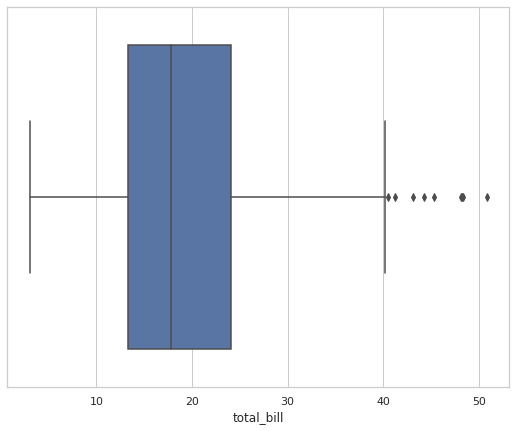

In [ ]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

Отобразим вертикальную прямоугольную диаграмму, сгруппированную по категориальной переменной day (день недели):

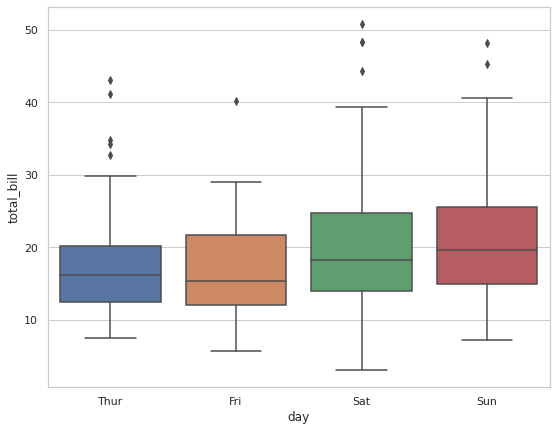

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

Ещё один способ увеличения информативности графика boxplot — использование параметра **hue**. Он дополнительно разделяет данные в зависимости от значения дополнительного категориального признака.Посмотрите, как меняется отображение boxplot при добавлении параметра hue:

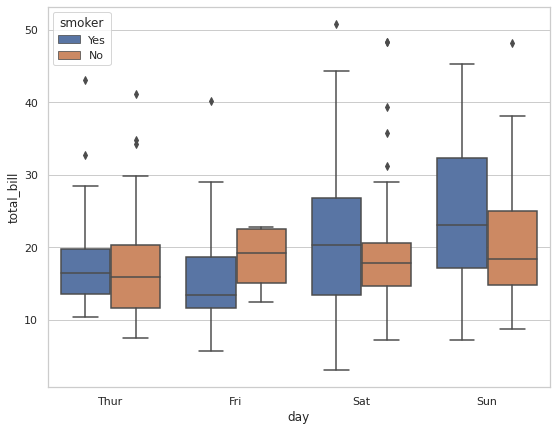

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

Такой способ представления информации позволяет нам увидеть, как менялось распределение общей суммы счета в разные дни недели отдельно для курящих и для клиентов, которые не курят

Таким образом, boxplot (ящик с усами) используется для составления гипотез и наглядной визуализации большого числа статистических данных. Внутри боксплота можно спрятать тысячи значений, но они все визуально помещаются на небольшом графике.
С его помощью можно разом показать основные статистические характеристики данных. 

Boxplot, или как его еще называют, «ящик с усами», по сути является «сплющенной» гистограммой. По этому графику можно легко понять состав наших данных и основную статистическую информацию. На нем показывается медиана, а также он более компактно отражает характер распределения значений переменной. 



---
Данные, которые распределены согласно закону нормального распределения, располагаются **симметрично относительно своего среднего значения**, а их графическое представление имеет колоколообразную форму. Большинство значений лежат между первым квантилем Q1 и третьим Q3 — внутри колокола. Медиана и среднее арифметическое при нормальном распределении всегда совпадают и имеют одинаковое значение.

![1last.png](https://github.com/datasciencefefu/course/raw/main/images/1last.png)